In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
import dlib

In [7]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_5_face_landmarks.dat')


In [17]:
def get_3channel(gray):

    img = np.zeros((*gray.shape, 3), dtype='uint8')
    for i in range(3):
        img[:,:, i] = gray

    return img


In [27]:
def four_point_transform(image, pts):
    
    rect = pts.astype('float32')
    (tl, tr, br, bl) = rect

    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
    
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
    
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")
    
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    
    if maxHeight>maxWidth:
        warped = np.rot90(warped)
    
    warped = cv2.cvtColor(warped, cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
    dets, scores, idx = detector.run(gray, 1, -1)
    if(len(dets) > 0):
        print("Detection {}, score: {}, face_type:{}".format(dets[0], scores[0], idx[0]))
    if(len(dets)==0 or scores[0] < 1):
        orig_score = scores[0]
        warped = np.rot90(warped)
        warped = np.rot90(warped)
        gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
    
        dets, scores, idx = detector.run(gray, 1, -1)
        if(len(dets) > 0):
            print("Inverted Detection {}, score: {}, face_type:{}".format(dets[0], scores[0], idx[0]))
        
        if(len(dets)==0 or (scores[0] < 1 and scores[0]<orig_score) ):
            assert(0)
            warped = np.rot90(warped)
            warped = np.rot90(warped)
    
    
    return warped



images/00.jpg


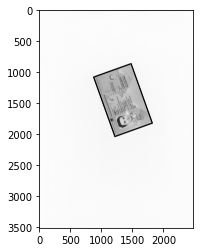

Detection [(734, 374) (889, 528)], score: -0.512622769878972, face_type:0
Inverted Detection [(115, 184) (270, 339)], score: 2.227306190921199, face_type:0


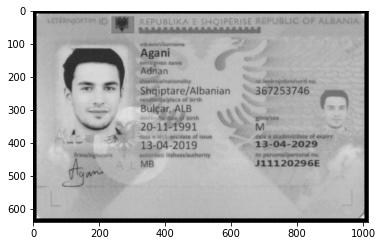

images/01.jpg


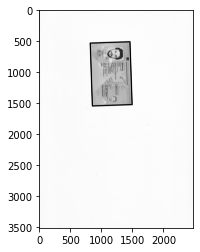

Detection [(115, 202) (270, 356)], score: 2.347456757022273, face_type:0


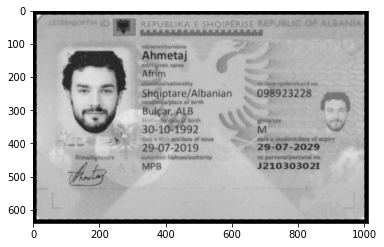

images/02.jpg


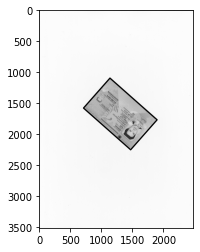

Detection [(698, 168) (827, 297)], score: -0.48497174631877504, face_type:1
Inverted Detection [(98, 184) (253, 339)], score: 2.725670162631404, face_type:0


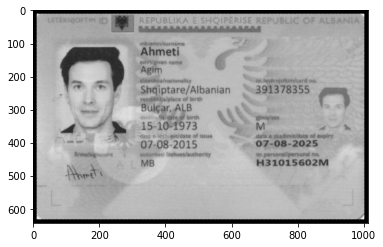

images/03.jpg


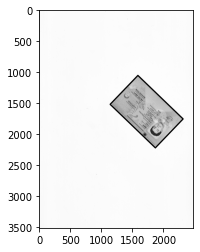

Detection [(752, 305) (906, 460)], score: -0.6801303829053018, face_type:2
Inverted Detection [(115, 184) (270, 339)], score: 1.7397711910737867, face_type:0


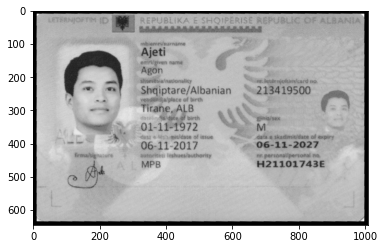

images/04.jpg


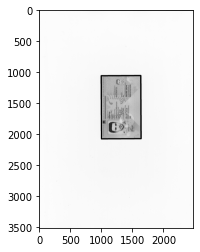

Detection [(516, 281) (559, 324)], score: -0.41240185122357653, face_type:0
Inverted Detection [(115, 202) (270, 356)], score: 2.4835379757417555, face_type:0


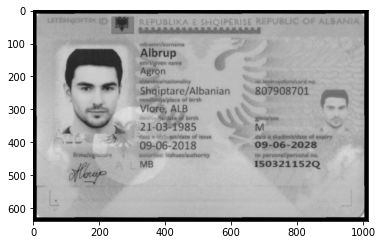

images/05.jpg


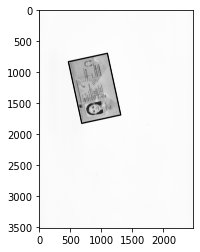

Detection [(66, 285) (155, 375)], score: 0.10109744416684174, face_type:2
Inverted Detection [(98, 202) (253, 356)], score: 2.1366475262178297, face_type:0


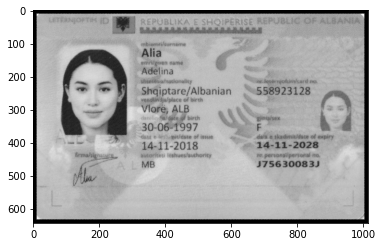

images/06.jpg


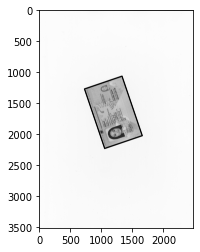

Detection [(36, 285) (126, 375)], score: 0.5480404053993646, face_type:1
Inverted Detection [(876, 279) (950, 354)], score: 2.2156193890107985, face_type:0


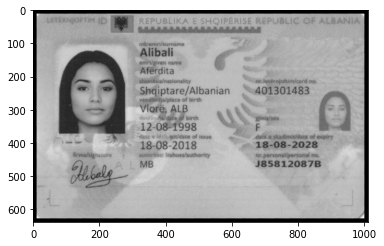

images/07.jpg


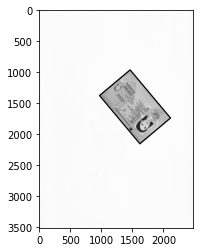

Detection [(71, 296) (146, 370)], score: 0.044565299620332954, face_type:2
Inverted Detection [(98, 184) (253, 339)], score: 2.1871107258333082, face_type:0


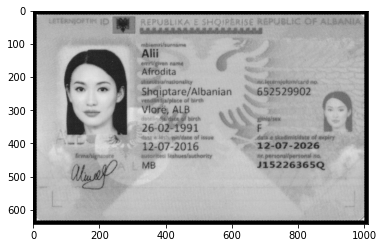

images/08.jpg


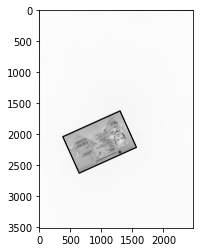

Detection [(752, 374) (906, 528)], score: -0.443462785290349, face_type:0
Inverted Detection [(115, 184) (270, 339)], score: 2.240475956393611, face_type:0


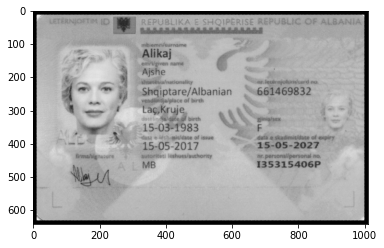

images/09.jpg


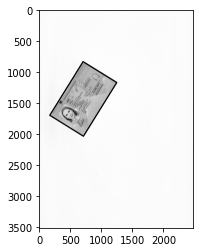

Detection [(98, 184) (253, 339)], score: 2.3428214230073805, face_type:0


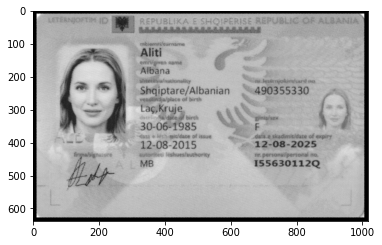

images/10.jpg


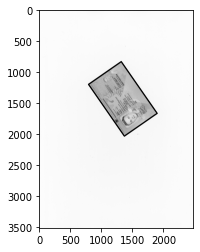

Detection [(769, 374) (924, 528)], score: -0.18807166437970446, face_type:0
Inverted Detection [(98, 184) (253, 339)], score: 2.845176998568904, face_type:0


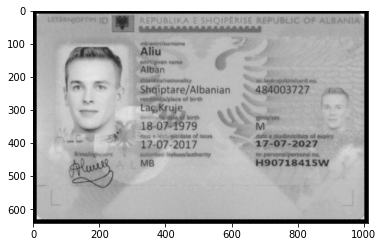

images/11.jpg


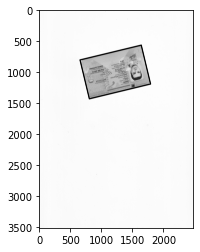

Detection [(752, 374) (906, 528)], score: -0.10842293124066638, face_type:0
Inverted Detection [(98, 184) (253, 339)], score: 2.625847641421687, face_type:0


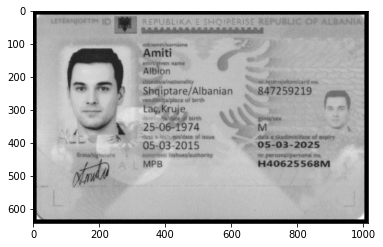

images/12.jpg


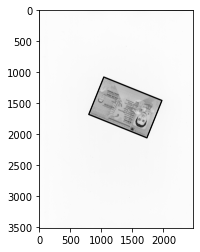

Detection [(55, 329) (129, 403)], score: -0.08766382555829333, face_type:0
Inverted Detection [(115, 202) (270, 356)], score: 2.6015046276582594, face_type:0


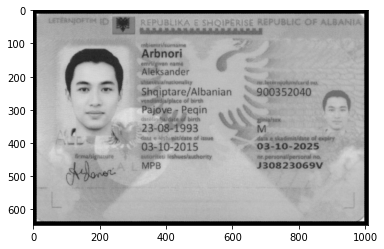

images/13.jpg


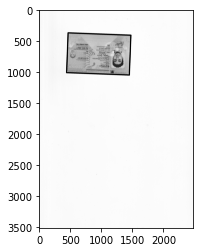

Detection [(734, 374) (889, 528)], score: -0.42934482912884997, face_type:0
Inverted Detection [(115, 184) (270, 339)], score: 1.6921609081758375, face_type:0


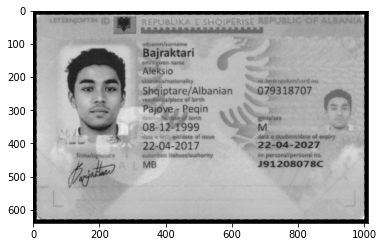

images/14.jpg


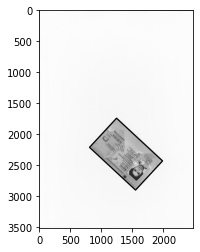

Detection [(698, 168) (827, 297)], score: -0.4626872385673102, face_type:1
Inverted Detection [(876, 279) (950, 354)], score: 1.772320095492732, face_type:0


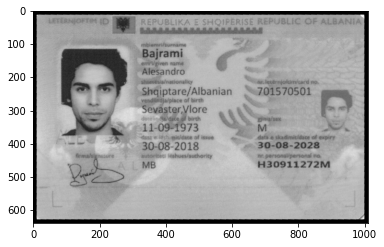

images/15.jpg


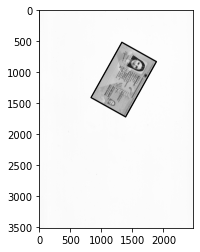

Detection [(696, 284) (882, 469)], score: 0.22657777417377867, face_type:1
Inverted Detection [(892, 279) (967, 354)], score: 2.258915249301326, face_type:0


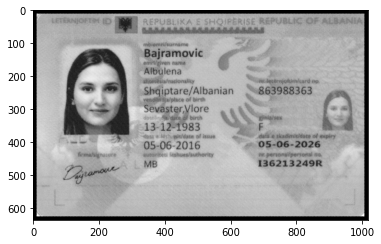

images/16.jpg


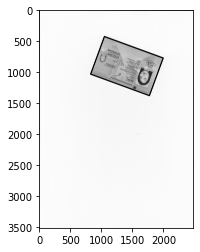

Detection [(56, 295) (145, 385)], score: 0.06155214654416108, face_type:2
Inverted Detection [(115, 184) (270, 339)], score: 2.2141993679536696, face_type:0


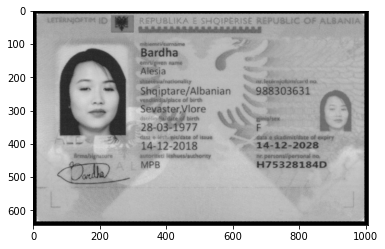

images/17.jpg


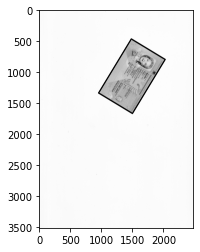

Detection [(696, 284) (882, 469)], score: -0.12488602053447329, face_type:1
Inverted Detection [(115, 184) (270, 339)], score: 2.5865047611726637, face_type:0


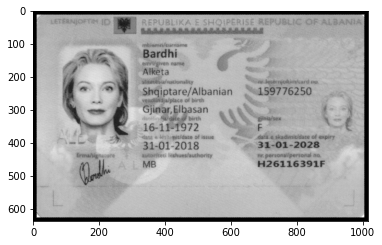

images/18.jpg


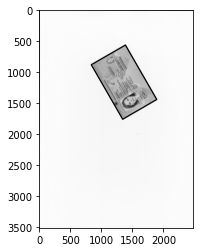

Detection [(696, 284) (882, 469)], score: 0.4390745316811029, face_type:1
Inverted Detection [(115, 184) (270, 339)], score: 2.7900145687593336, face_type:0


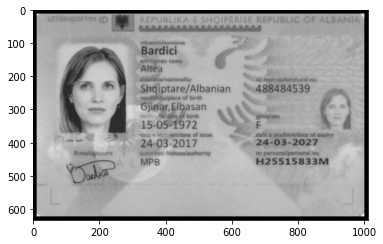

images/19.jpg


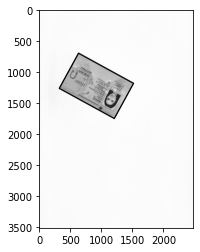

Detection [(734, 374) (889, 528)], score: -0.06667321543561266, face_type:0
Inverted Detection [(115, 184) (270, 339)], score: 2.5349229015840407, face_type:0


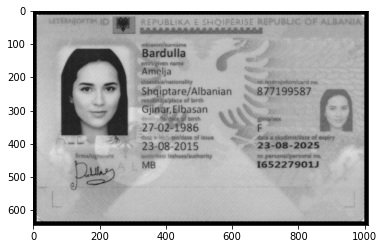

images/20.jpg


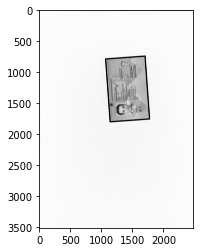

Detection [(752, 356) (906, 511)], score: -0.39751237254010485, face_type:0
Inverted Detection [(115, 202) (270, 356)], score: 2.2843382992280836, face_type:0


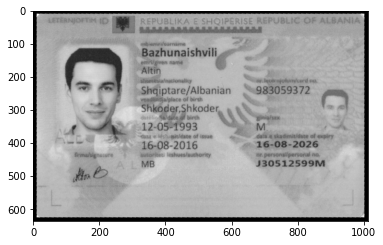

images/21.jpg


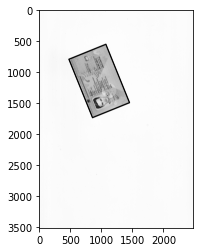

Detection [(752, 374) (906, 528)], score: -0.49895184855328845, face_type:0
Inverted Detection [(98, 202) (253, 356)], score: 2.0297997631563063, face_type:0


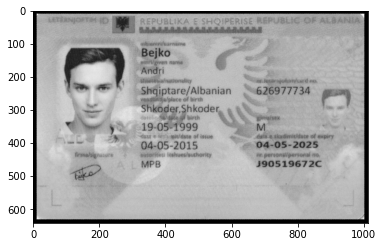

images/22.jpg


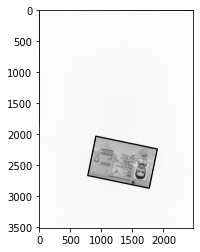

Detection [(752, 374) (906, 528)], score: -0.5519573054777269, face_type:0
Inverted Detection [(115, 202) (270, 356)], score: 2.8361786045564528, face_type:0


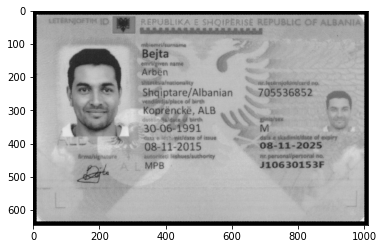

images/23.jpg


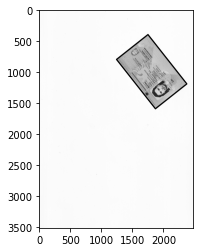

Detection [(36, 285) (126, 375)], score: -0.15044735323711, face_type:1
Inverted Detection [(115, 202) (270, 356)], score: 1.9553936161531325, face_type:0


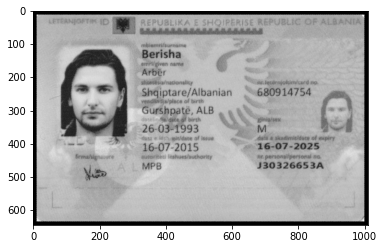

images/24.jpg


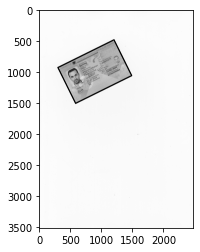

Detection [(98, 202) (253, 356)], score: 3.084397617770564, face_type:0


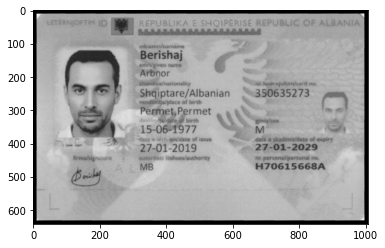

images/25.jpg


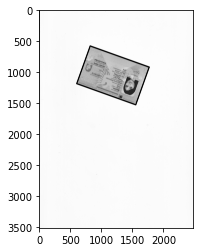

Detection [(734, 356) (889, 511)], score: 0.13570882428364195, face_type:1
Inverted Detection [(884, 279) (959, 354)], score: 1.3025015034211989, face_type:0


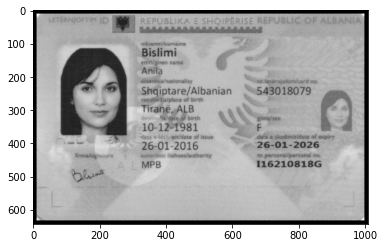

images/26.jpg


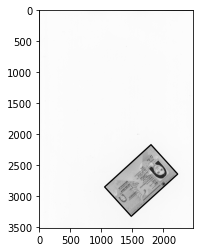

Detection [(66, 285) (155, 375)], score: 0.3611043487688925, face_type:2
Inverted Detection [(98, 184) (253, 339)], score: 3.1264188923372145, face_type:0


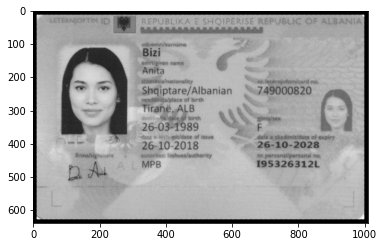

images/27.jpg


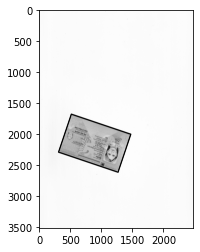

Detection [(696, 284) (882, 469)], score: 0.09303189862446226, face_type:1
Inverted Detection [(115, 184) (270, 339)], score: 2.635190788699519, face_type:0


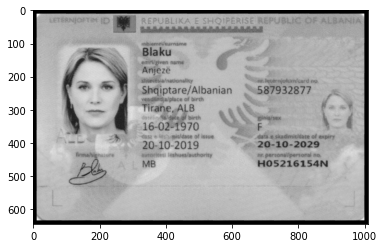

images/28.jpg


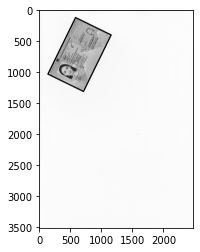

Detection [(876, 279) (950, 354)], score: 2.7409837879670973, face_type:0


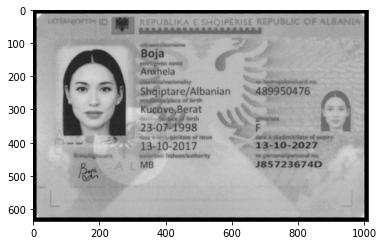

images/29.jpg


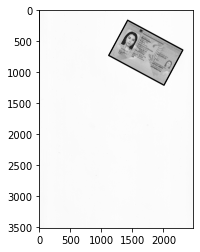

Detection [(115, 202) (270, 356)], score: 3.0698316730989332, face_type:0


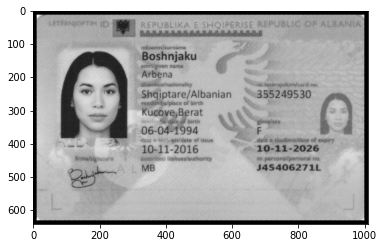

images/30.jpg


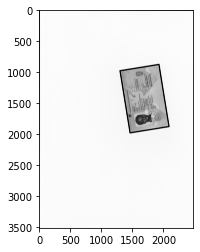

Detection [(568, 300) (612, 343)], score: -0.7877611480222826, face_type:0
Inverted Detection [(115, 202) (270, 356)], score: 0.9422114529146071, face_type:0


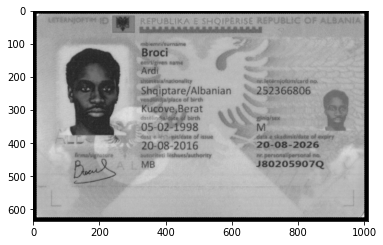

images/31.jpg


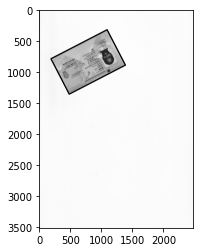

Detection [(158, 164) (210, 216)], score: -0.6889843307005052, face_type:0
Inverted Detection [(115, 184) (270, 339)], score: 0.9122188725007887, face_type:0


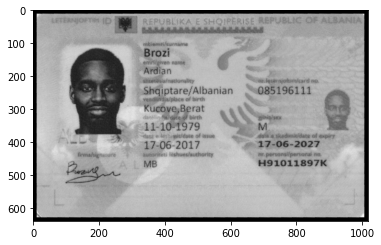

images/32.jpg


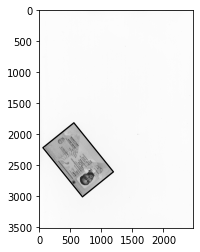

Detection [(193, 402) (229, 438)], score: -0.6317838988767748, face_type:0
Inverted Detection [(98, 184) (253, 339)], score: 1.6685069241060133, face_type:0


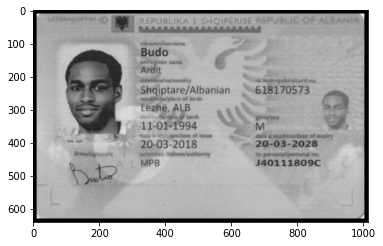

images/33.jpg


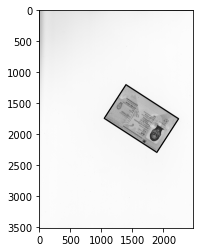

Detection [(769, 356) (924, 511)], score: -0.4704139838375605, face_type:3
Inverted Detection [(98, 184) (253, 339)], score: 1.3916896023286696, face_type:0


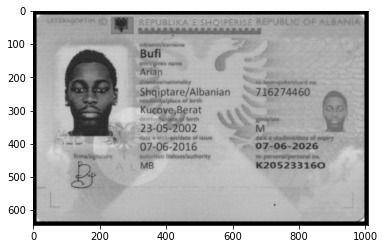

images/34.jpg


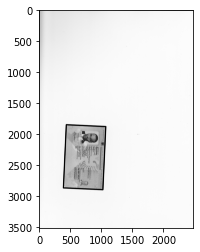

Detection [(617, 242) (653, 278)], score: -0.522210105770069, face_type:1
Inverted Detection [(115, 202) (270, 356)], score: 1.2072404064668532, face_type:0


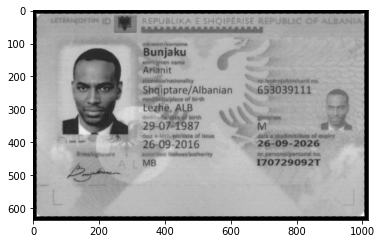

images/35.jpg


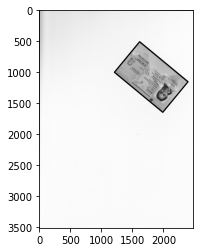

Detection [(758, 284) (944, 469)], score: -0.19600643766909576, face_type:2
Inverted Detection [(115, 184) (270, 339)], score: 2.0378358997835035, face_type:0


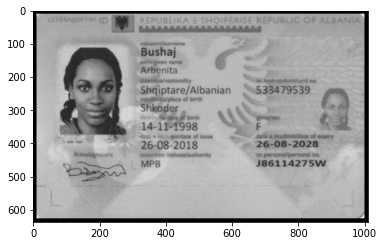

images/36.jpg


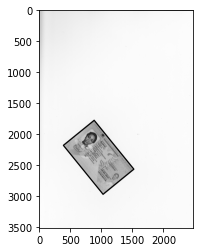

In [ ]:
def inplane_correct():

    for image_path in image_paths:
        print(image_path)
        img = cv2.imread(image_path)
        mask = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        gray = get_3channel(mask)
        mask = cv2.bitwise_not(mask)

        (thresh, bw_img) = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#         if debug:
#             out = bw_img.copy()
#             out = cv2.resize(out, None, fx=0.25, fy=0.25)
#             cv2.imshow('bw_img ',out)
#             cv2.waitKey(-1)

        contours, hierarchy = cv2.findContours(bw_img, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        contours = sorted(contours, key=lambda x: cv2.contourArea(x),reverse=True)
        cnt = contours[0]
        rect = cv2.minAreaRect(cnt)
        angle = rect[-1]

        box = cv2.boxPoints(rect)
        box = np.int0(box)
        
        warped = four_point_transform(img, box)
#         cv2.imshow('warped ',warped)
#         cv2.waitKey(-1)
        
        imgplot=plt.imshow(warped)
        plt.show()


In [12]:
# image_list=glob.glob("images/*")

# for images in image_list:
#     src = cv2.imread(images)
#     img_orig = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY);
#     img=img_orig.copy()
#     RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#     gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
#     gray = cv2.bitwise_not(gray)
#     (thresh, blackAndWhiteImage) = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#     # cv2.imshow('Features', blackAndWhiteImage)

#     contours, hierarchy = cv2.findContours(blackAndWhiteImage,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#     contours = sorted(contours, key=lambda x: cv2.contourArea(x),reverse=True)
#     cnt = contours[0]
#     rect = cv2.minAreaRect(cnt)
# #     print(rect)

#     angle=rect[-1]
# #     print(angle)
#     box = cv2.boxPoints(rect)
# #     print(box)
#     box = np.int0(box)
#     cv2.drawContours(img,[box],0,(0,0,255),20)
# #     imgplot=plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# #     plt.show()
#     (h, w) = src.shape[:2]
#     print(h,w)
#     center = (w // 2, h // 2)
#     M = cv2.getRotationMatrix2D(center, float(angle), 1.0)
#     rotated = cv2.warpAffine(src, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
#     cv2.putText(rotated, "Angle: {:.2f} degrees".format(angle),(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
#     print("[INFO] angle: {:.3f}".format(angle))
#     imgplot=plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
#     plt.show()